In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [ ]:
def exp(tau):
    return -tau*np.log(1-np.random.uniform())

In [ ]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

In [ ]:
N = 1000
t0 = 5
dat = pdf(N,t0)
plt.hist(dat)

In [ ]:
def likelihood(dati,t):
    
    return np.prod([np.exp(-i/t)/t for i in dati])

In [ ]:
dati = pdf(10,5)

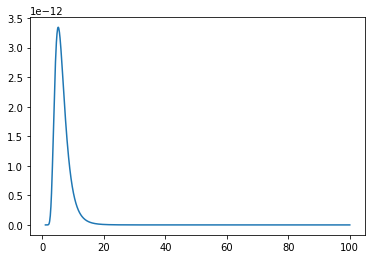

In [21]:
#Likelihood
rang = np.linspace(1,100,1000)

like = [likelihood(dati,t) for t in rang]

plt.plot(rang,like)
# plt.plot(rang,np.log(like))

In [ ]:
def logLikelihood(dati,t):
    
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

In [ ]:
logLike = [logLikelihood(dati,t) for t in rang]

plt.plot(rang,logLike)

In [ ]:
def min(dati):


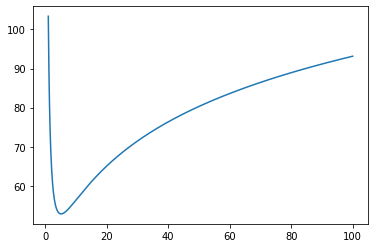

In [22]:
rang = np.linspace(1,100,1000)

l = [-2*logLikelihood(dati,t) for t in rang]

plt.plot(rang,l)
